In [12]:
import pandas as pd                  
import numpy as np

# URL for Annual Population by Age and Sex - Department of Economic and Social Affairs, United Nations
#source = '../Section 4/WPP2015_DB04_Population_Annual.zip'
source = "https://github.com/PacktPublishing/Matplotlib-2.x-By-Example/raw/\
master/WPP2015_DB04_Population_Annual.zip"


# Select the aggregated population data from the world for both genders,
#during 1950 to 2017.
population_df = pd.read_csv(source, header=0, compression='zip',encoding='latin_1') 
population_df.head() # Show the first five rows of the DataFrame



,LocID,Location,VarID,Variant,Time,MidPeriod,SexID,Sex,AgeGrp,AgeGrpStart,AgeGrpSpan,Value
0,4,Afghanistan,2,Medium,1950,1950.5,1,Male,0-4,0,5,630.044
1,4,Afghanistan,2,Medium,1950,1950.5,1,Male,5-9,5,5,516.205
2,4,Afghanistan,2,Medium,1950,1950.5,1,Male,10-14,10,5,461.378
3,4,Afghanistan,2,Medium,1950,1950.5,1,Male,15-19,15,5,414.368
4,4,Afghanistan,2,Medium,1950,1950.5,1,Male,20-24,20,5,374.110


## Insert counrty code

In [13]:
from pycountry import countries

def get_alpha_3(location):
    """Convert full country name to three letter code (ISO 3166 alpha-3)
     
    Args:
        location: Full location name
    Returns:
        three letter code or None if not found"""
    
    try:
        return countries.get(name=location).alpha_3
    except:
        return None
    
# Add a new country column to the dataframe
population_df['country'] = population_df['Location'].apply(lambda x: get_alpha_3(x))
population_df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,SexID,Sex,AgeGrp,AgeGrpStart,AgeGrpSpan,Value,country
0,4,Afghanistan,2,Medium,1950,1950.5,1,Male,0-4,0,5,630.044,AFG
1,4,Afghanistan,2,Medium,1950,1950.5,1,Male,5-9,5,5,516.205,AFG
2,4,Afghanistan,2,Medium,1950,1950.5,1,Male,10-14,10,5,461.378,AFG
3,4,Afghanistan,2,Medium,1950,1950.5,1,Male,15-19,15,5,414.368,AFG
4,4,Afghanistan,2,Medium,1950,1950.5,1,Male,20-24,20,5,374.110,AFG


## Population type

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


current_population = population_df[(population_df.Time == 2015) &
                                   (population_df.Sex == 'Both')]
current_population[current_population['country'] == 'AFG']

,LocID,Location,VarID,Variant,Time,MidPeriod,SexID,Sex,AgeGrp,AgeGrpStart,AgeGrpSpan,Value,country
3657,4,Afghanistan,2,Medium,2015,2015.5,3,Both,0-4,0,5,4950.250,AFG
3658,4,Afghanistan,2,Medium,2015,2015.5,3,Both,5-9,5,5,4903.273,AFG
3659,4,Afghanistan,2,Medium,2015,2015.5,3,Both,10-14,10,5,4471.809,AFG
3660,4,Afghanistan,2,Medium,2015,2015.5,3,Both,15-19,15,5,3833.084,AFG
3661,4,Afghanistan,2,Medium,2015,2015.5,3,Both,20-24,20,5,3051.662,AFG
3662,4,Afghanistan,2,Medium,2015,2015.5,3,Both,25-29,25,5,2460.206,AFG
3663,4,Afghanistan,2,Medium,2015,2015.5,3,Both,30-34,30,5,2061.977,AFG
3664,4,Afghanistan,2,Medium,2015,2015.5,3,Both,35-39,35,5,1672.963,AFG
3665,4,Afghanistan,2,Medium,2015,2015.5,3,Both,40-44,40,5,1312.233,AFG
3666,4,Afghanistan,2,Medium,2015,2015.5,3,Both,45-49,45,5,1040.130,AFG


In [17]:

pop_type_list = []
for country in population_df['country'].dropna().unique():
    if not country in current_population.country.values:
        continue

    young = current_population[(current_population.country == country) &
                               (current_population.AgeGrp == "0-4")].Value
    
    midage = current_population[(current_population.country == country) &
                               (current_population.AgeGrp == "50-54")].Value
    
    ratio = float(young) / float(midage)
    
    if ratio < 0.8:
        pop_type = "constrictive"
    elif ratio < 1.2 and ratio >= 0.8:
        pop_type = "stable"
    else:
        pop_type = "expansive"
        
    pop_type_list.append([country, ratio, pop_type])
    
pop_type_df = pd.DataFrame(pop_type_list, columns=['country','ratio','population type'])
pop_type_df.head()

,country,ratio,population type
0,AFG,6.013818,expansive
1,ALB,0.905478,stable
2,DZA,2.573893,expansive
3,AGO,7.748260,expansive
4,ATG,1.229730,expansive


In [5]:
# Select the aggregated population data from the world for both genders,
#during 1950 to 2017.
selected_data = population_df[
    (population_df.Location == 'WORLD') & 
    (population_df.Sex == 'Both') & 
    (population_df.Time <= 2017) 
]
selected_data.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,SexID,Sex,AgeGrp,AgeGrpStart,AgeGrpSpan,Value,country
1815667,900,WORLD,2,Medium,1950,1950.5,3,Both,0-4,0,5,337431.893,None
1815668,900,WORLD,2,Medium,1950,1950.5,3,Both,5-9,5,5,269549.563,None
1815669,900,WORLD,2,Medium,1950,1950.5,3,Both,10-14,10,5,260285.973,None
1815670,900,WORLD,2,Medium,1950,1950.5,3,Both,15-19,15,5,238628.448,None
1815671,900,WORLD,2,Medium,1950,1950.5,3,Both,20-24,20,5,221780.909,None


In [6]:
# Calculate aggregated population data across all age groups for each year 
# Set as_index=False to avoid the Time variable to be used as index
grouped_data = selected_data.groupby('Time', as_index=False).sum()
grouped_data.head()

,Time,LocID,VarID,MidPeriod,SexID,AgeGrpStart,AgeGrpSpan,Value
0,1950,15300,34,33158.5,51,680,100,2525149.312
1,1951,15300,34,33175.5,51,680,100,2571867.515
2,1952,15300,34,33192.5,51,680,100,2617940.399
3,1953,15300,34,33209.5,51,680,100,2664029.010
4,1954,15300,34,33226.5,51,680,100,2710677.773


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Select the aggregated population data from the world for each gender, during 1950 to 2017.
male_data = population_df[(population_df.Location == 'WORLD') & 
                          (population_df.Sex == 'Male') & 
                          (population_df.Time <= 2017)]
female_data = population_df[(population_df.Location == 'WORLD') & 
                            (population_df.Sex == 'Female') & 
                            (population_df.Time <= 2017)]

# Calculate aggregated population data across all age groups for each year 
# Set as_index=False to avoid the Time variable to be used as index
grouped_male_data = male_data.groupby('Time', as_index=False).sum()
grouped_female_data = female_data.groupby('Time', as_index=False).sum()

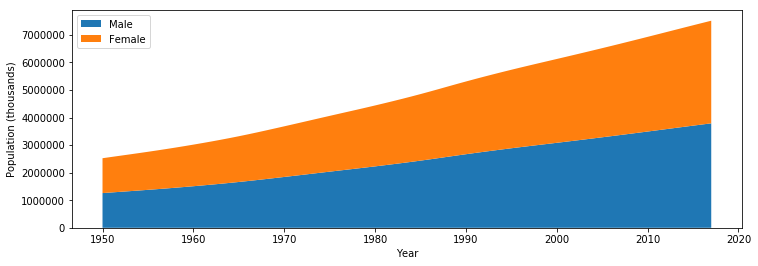

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4), sharex=True, sharey=True)
ax.stackplot(
    grouped_male_data.Time, 
    grouped_male_data.Value, 
    grouped_female_data.Value
)

ax.set_xlabel('Year')
ax.set_ylabel('Population (thousands)')
ax.legend(['Male', 'Female'], loc='upper left')

plt.show()

In [44]:
# Calculate aggregated population data across all age groups for each year 
# Set as_index=False to avoid the Time variable to be used as index
male_agegroup_data = male_data.groupby('AgeGrp', as_index=False).sum()
male_agegroup_data.head()

,AgeGrp,LocID,VarID,Time,MidPeriod,SexID,AgeGrpStart,AgeGrpSpan,Value
0,0-4,61200,136,134878,134912.0,68,0,340,1.936006e+07
1,10-14,61200,136,134878,134912.0,68,680,340,1.671143e+07
2,100+,25200,56,56098,56112.0,28,2800,-28,1.344985e+03
3,15-19,61200,136,134878,134912.0,68,1020,340,1.560749e+07
4,20-24,61200,136,134878,134912.0,68,1360,340,1.443489e+07


In [45]:
# Calculate aggregated population data across all age groups
# Set as_index=False to avoid the Time variable to be used as index
female_agegroup_data = female_data.groupby('AgeGrp', as_index=False).sum()
female_agegroup_data.head()

,AgeGrp,LocID,VarID,Time,MidPeriod,SexID,AgeGrpStart,AgeGrpSpan,Value
0,0-4,61200,136,134878,134912.0,136,0,340,1.835255e+07
1,10-14,61200,136,134878,134912.0,136,680,340,1.587866e+07
2,100+,25200,56,56098,56112.0,56,2800,-28,5.348387e+03
3,15-19,61200,136,134878,134912.0,136,1020,340,1.488483e+07
4,20-24,61200,136,134878,134912.0,136,1360,340,1.385439e+07
